In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv('sessions.csv', parse_dates=['date'])

In [118]:
data.head()

,date,session_id,user_id,duration,value,has_purchase
0,2022-07-01,785266,109298,1680,137,0
1,2022-07-01,785333,119496,713,77,0
2,2022-07-01,785490,123265,1266,88,0
3,2022-07-01,785585,132511,844,14,0
4,2022-07-01,785635,132728,1534,231,0


In [119]:
data['duration'] = data['duration'] // 60

In [120]:
users = data.groupby('duration')['session_id'].count().reset_index().rename(columns={'session_id': 'session_cnt'})
users

,duration,session_cnt
0,0,35028
1,1,37023
2,2,36865
3,3,36548
4,4,36334
...,...,...
69,69,1
70,71,3
71,72,1
72,73,1


(array([2.90132e+05, 2.12093e+05, 1.57132e+05, 7.11330e+04, 3.38690e+04,
        9.70200e+03, 2.88200e+03, 5.12000e+02, 9.30000e+01, 9.00000e+00]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

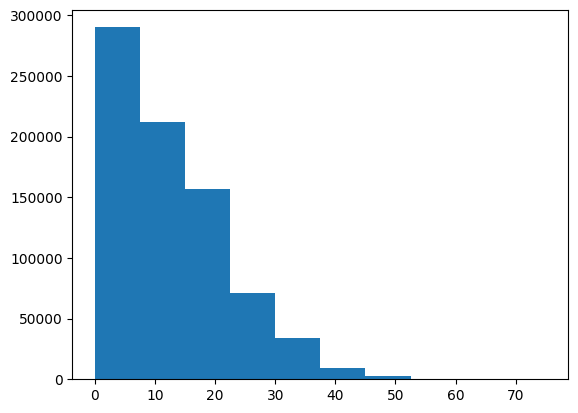

In [121]:
plt.hist(data['duration'])

(array([218388., 170763., 160910.,  94677.,  61366.,  41328.,  16927.,
          8957.,   2746.,   1111.]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <BarContainer object of 10 artists>)

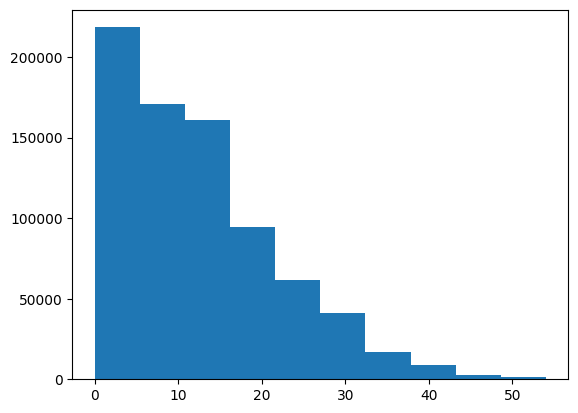

In [122]:
plt.hist(data[data['duration'] < 55]['duration'])

In [123]:
duration_bins = pd.cut(data['duration'], 
                       [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, data['duration'].max()],
                       include_lowest=True)
data['duration_bins'] = duration_bins
duration_bins = data.groupby('duration_bins')['session_id'].count().reset_index()

/var/folders/g9/9x366fjx5jbghy320s4vpxp80000gn/T/ipykernel_97905/4283875826.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_bins = data.groupby('duration_bins')['session_id'].count().reset_index()


In [124]:
duration_bins

,duration_bins,session_id
0,"(-0.001, 1.0]",72051
1,"(1.0, 2.0]",36865
2,"(2.0, 3.0]",36548
3,"(3.0, 4.0]",36334
4,"(4.0, 5.0]",36590
5,"(5.0, 10.0]",170763
6,"(10.0, 15.0]",137612
7,"(15.0, 20.0]",101730
8,"(20.0, 25.0]",67769
9,"(25.0, 30.0]",40492


<Axes: xlabel='duration_bins'>

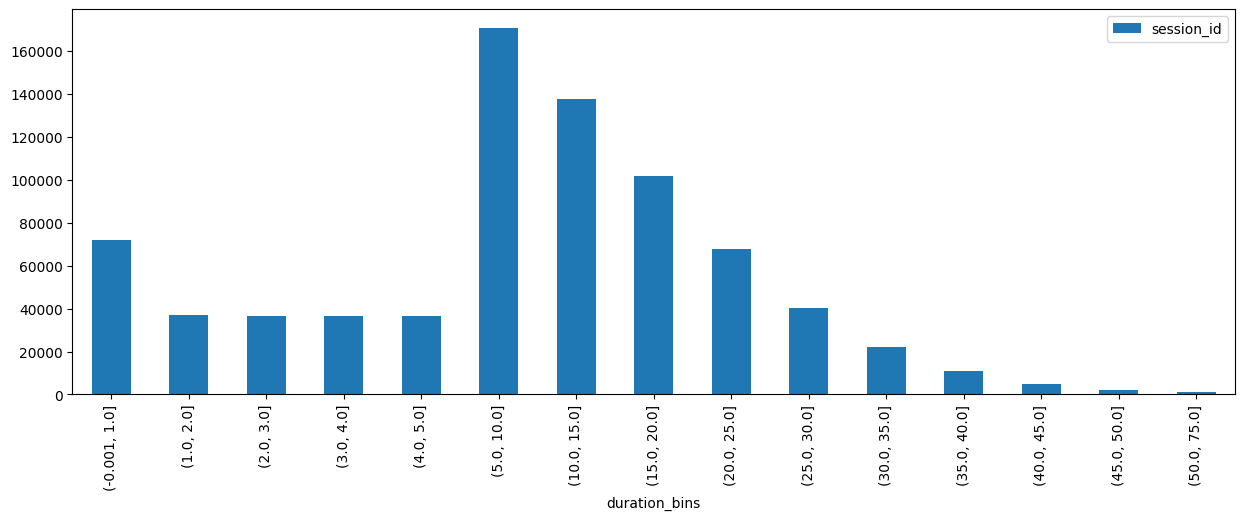

In [125]:
duration_bins.plot.bar(x='duration_bins', y='session_id', figsize=(15, 5))

In [126]:
durations_and_purchases = data.groupby(['has_purchase', 'duration_bins'])['session_id'].count().reset_index()
durations_and_purchases

/var/folders/g9/9x366fjx5jbghy320s4vpxp80000gn/T/ipykernel_97905/3007194277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durations_and_purchases = data.groupby(['has_purchase', 'duration_bins'])['session_id'].count().reset_index()


,has_purchase,duration_bins,session_id
0,0,"(-0.001, 1.0]",72051
1,0,"(1.0, 2.0]",36865
2,0,"(2.0, 3.0]",36548
3,0,"(3.0, 4.0]",35949
4,0,"(4.0, 5.0]",35348
5,0,"(5.0, 10.0]",162152
6,0,"(10.0, 15.0]",130066
7,0,"(15.0, 20.0]",95482
8,0,"(20.0, 25.0]",63279
9,0,"(25.0, 30.0]",37491


<Axes: xlabel='duration_bins'>

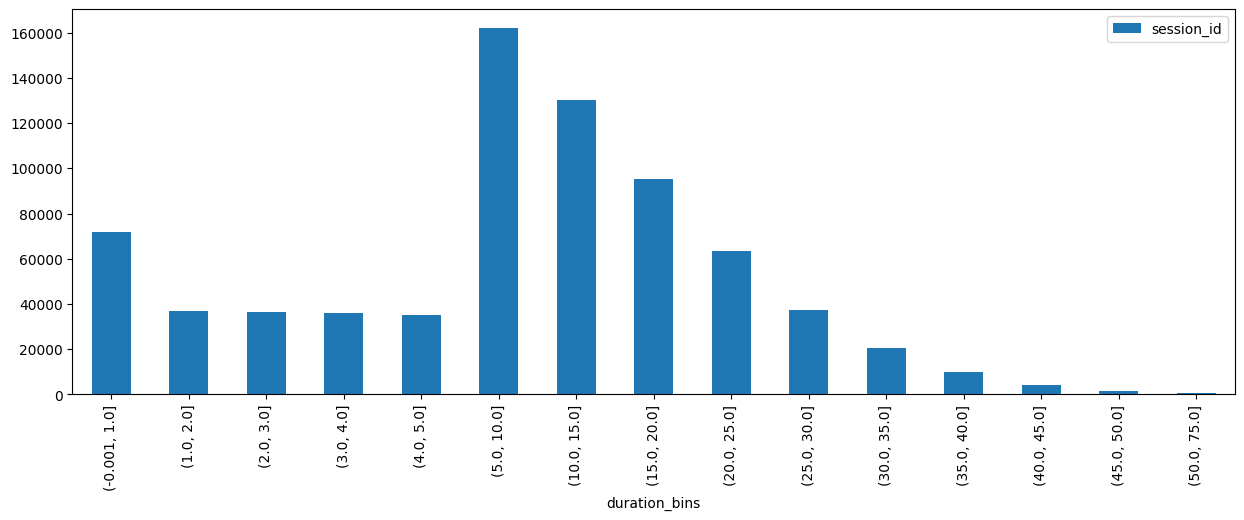

In [127]:
durations_and_purchases[durations_and_purchases['has_purchase'] == 0].plot.bar(x='duration_bins', y='session_id', figsize=(15,5))

<Axes: xlabel='duration_bins'>

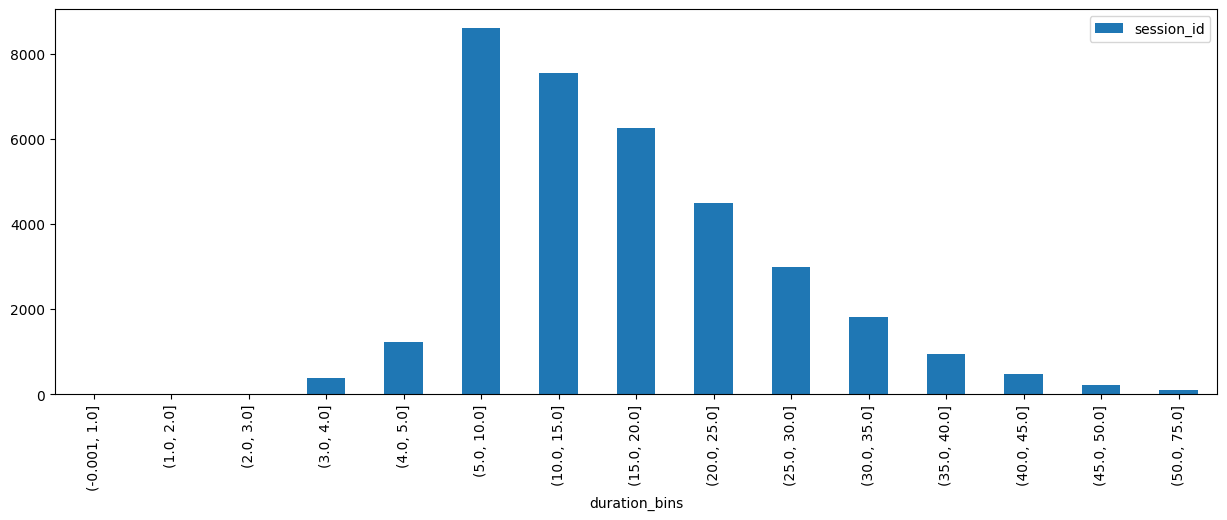

In [129]:
durations_and_purchases[durations_and_purchases['has_purchase'] == 1].plot.bar(x='duration_bins', y='session_id', figsize=(15,5))

In [130]:
duration_bins = pd.cut(data['duration'], 
                    bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, data['value'].max()],
                    labels=[0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                    include_lowest=True)
data['duration_bins'] = duration_bins

/var/folders/g9/9x366fjx5jbghy320s4vpxp80000gn/T/ipykernel_97905/343908927.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels((0, "50K", "100K", "150K", "200K"))


[Text(0, 0.0, '0'),
 Text(0, 50000.0, '50K'),
 Text(0, 100000.0, '100K'),
 Text(0, 150000.0, '150K'),
 Text(0, 200000.0, '200K'),
 Text(0, 250000.0, '')]

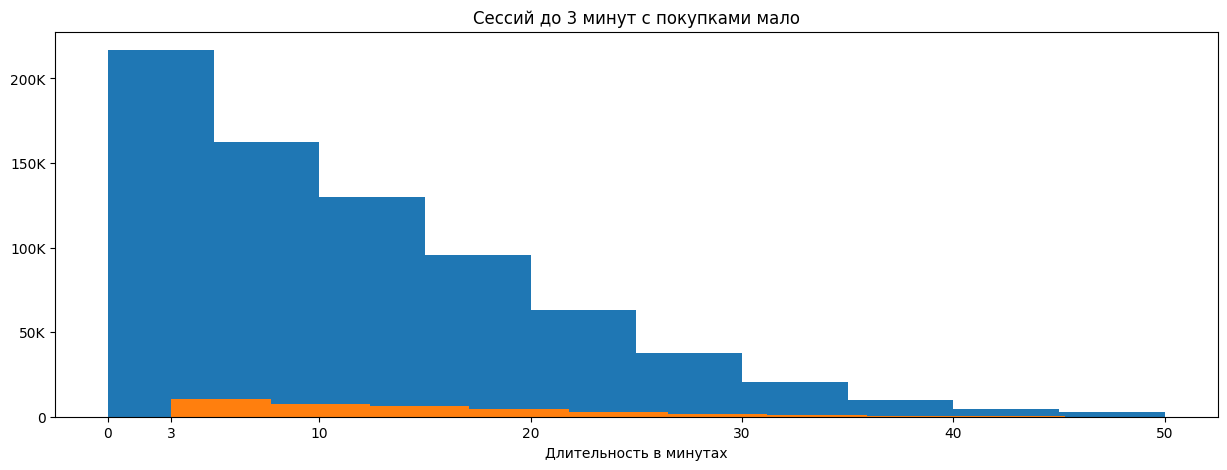

In [131]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(data.loc[data['has_purchase'] == 0]['duration_bins'], label='Без покупок')
ax.hist(data.loc[data['has_purchase'] == 1]['duration_bins'], label='С покупками')
ax.set_title('Сессий до 3 минут с покупками мало')
ax.set_xlabel('Длительность в минутах')
ax.set_xticks((0, 3, 10, 20, 30, 40, 50))
ax.set_yticklabels((0, "50K", "100K", "150K", "200K"))